![Logo](bdu.png)

## Assignment 2
### Course Cose : IoT 4314
### Name : Jul Jalal Al-Mamur Sayor
### ID : 1901029

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Study Metarials\3rd yr 2nd sem\Data Science\Data Science lab\Mall_Customers.csv')
df.tail(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [3]:
df.shape

(200, 5)

In [4]:
null_counts = df.isnull().sum()
print(null_counts)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Checking Probable cluster for different combination 

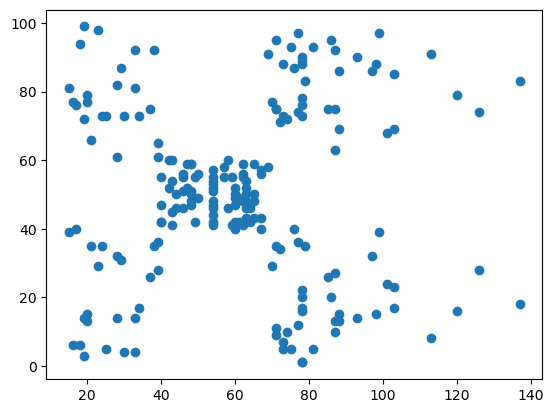

In [6]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)']) ## better combibation of features

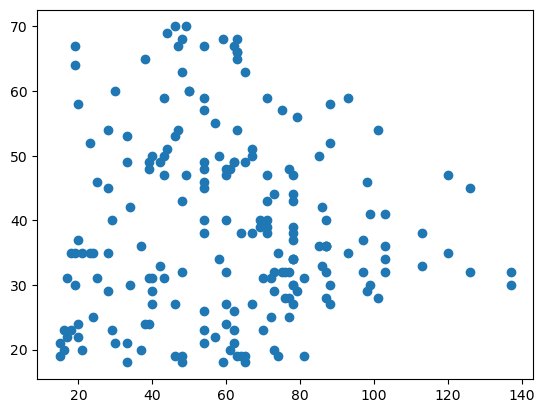

In [7]:
plt.scatter(df['Annual Income (k$)'],df['Age'])

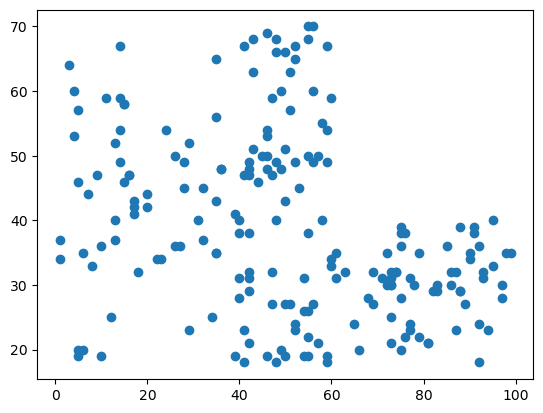

In [8]:
plt.scatter(df['Spending Score (1-100)'],df['Age'])

 ## Part A - K-means Clustering

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

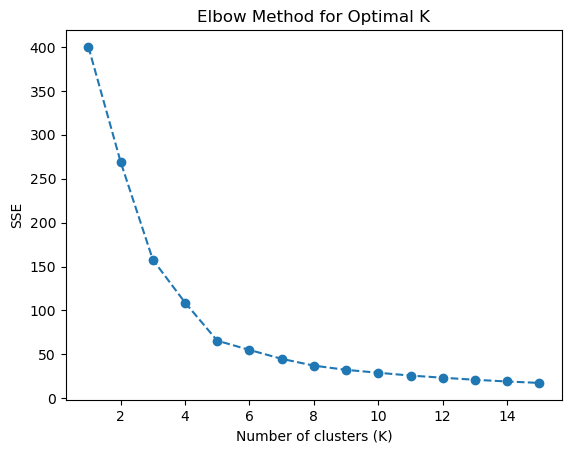

In [9]:
X = df.iloc[:, [3, 4]].values  # Annual Income, and Spending Score

# Standardize the data 
sc = StandardScaler()
X = sc.fit_transform(X)

# Initialize an empty list to store SSE values for different K
sse = []

# Create a loop to fit K-means for different values of K
for k in range(1, 16):
    # Create a K-Means model with K clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the K-Means model to your data
    kmeans.fit(X)
    
    # Calculate the SSE (Inertia) and append it to the list sse
    sse.append(kmeans.inertia_)

# Plot SSE values for different K
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.plot(range(1, 16), sse, marker='o', linestyle='--')
plt.show()

## part B Hierarchical Clustering:

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
# Perform hierarchical clustering using Ward's linkage method
linked = linkage(X, method='ward', metric='euclidean')

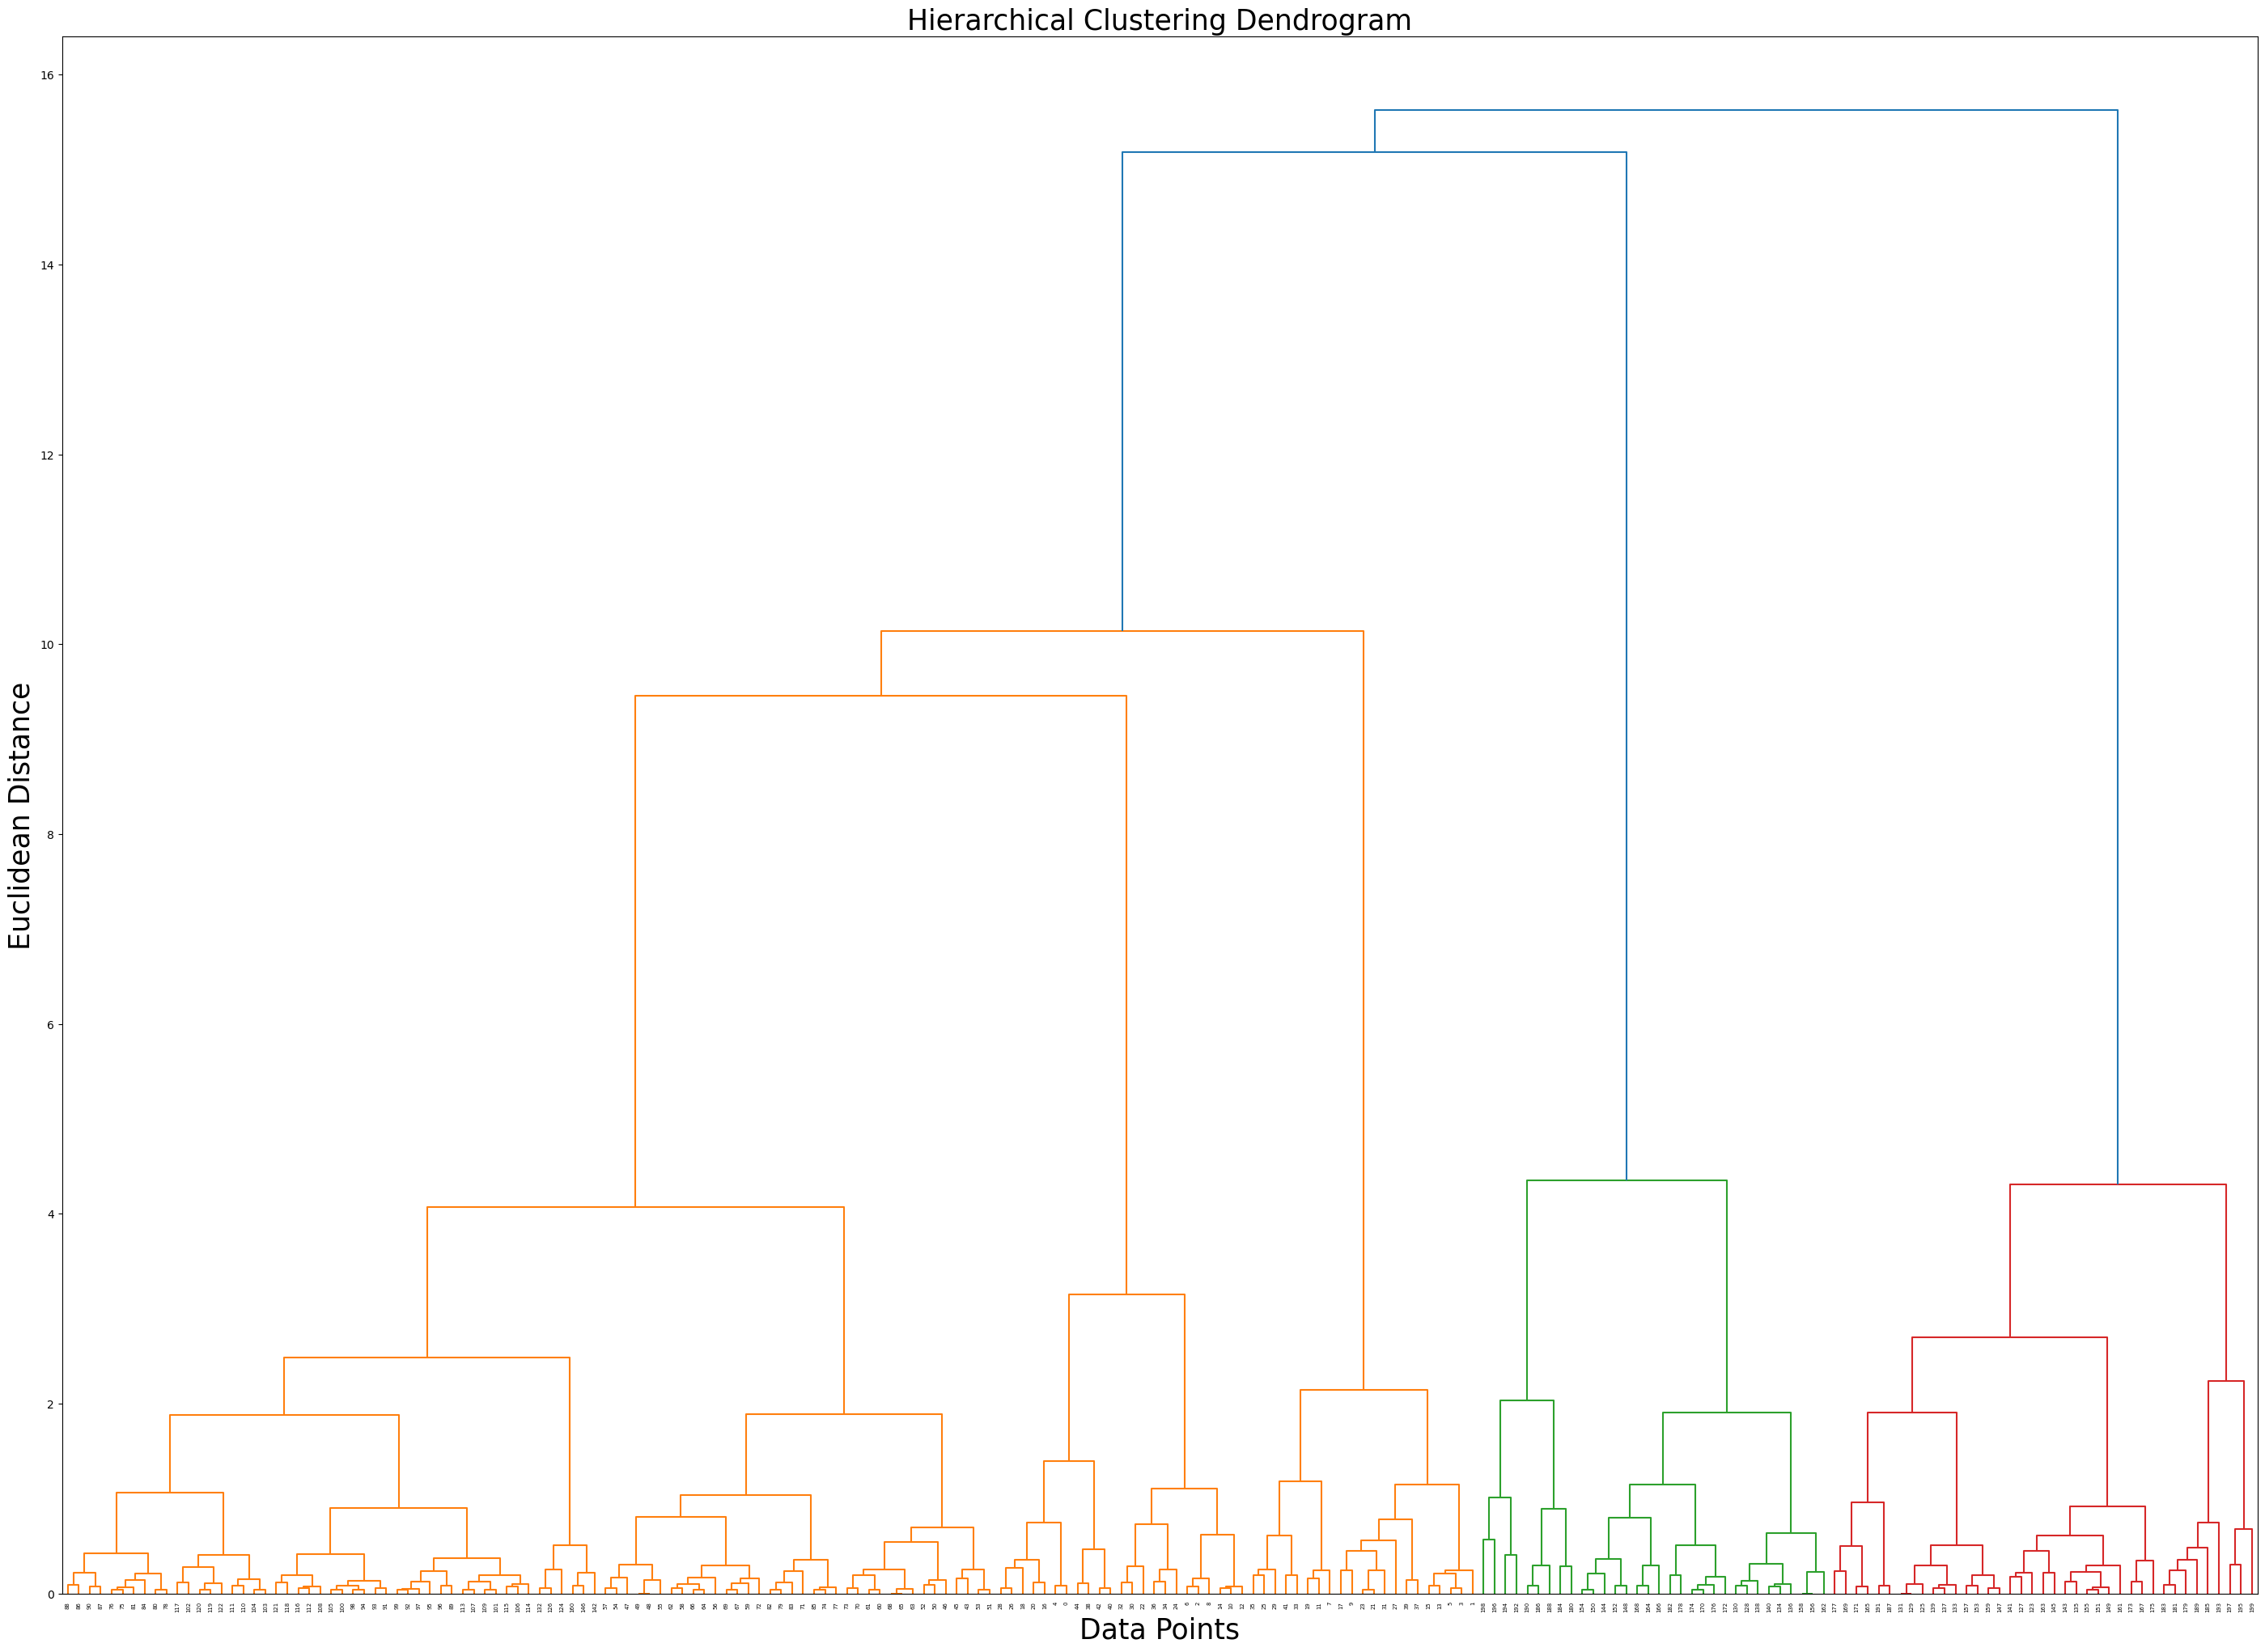

In [12]:
# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(35,25))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram',size='25')
plt.xlabel('Data Points',size='25')
plt.ylabel('Euclidean Distance',size='25')
plt.show()

## part C - Density-based Clustering

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
# Create a DBSCAN clustering model
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get the labels assigned to each data point
labels = dbscan.labels_

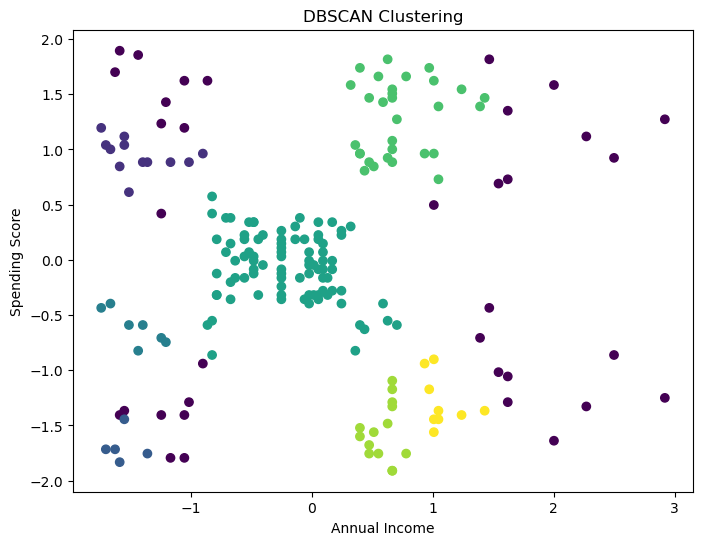

In [15]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()